In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries and Dataset

In [2]:
#Importing Libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Ignoring Warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing Dataset to Notebook
data = pd.read_csv('/content/drive/MyDrive/EI_Systems/payment_dataset.csv')
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
#Information about Dataset
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Data Visualization


In [7]:
# Checking if there any null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
#Checking how many features are object type
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

#Checking how many features are integer type
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

#Checking how many features are float type
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 3
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

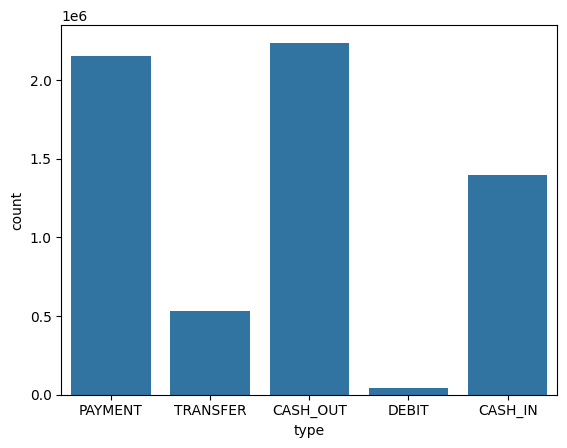

In [9]:
# Plotting Dataset compared to type feature
sns.countplot(x='type', data=data)


<Axes: xlabel='type', ylabel='amount'>

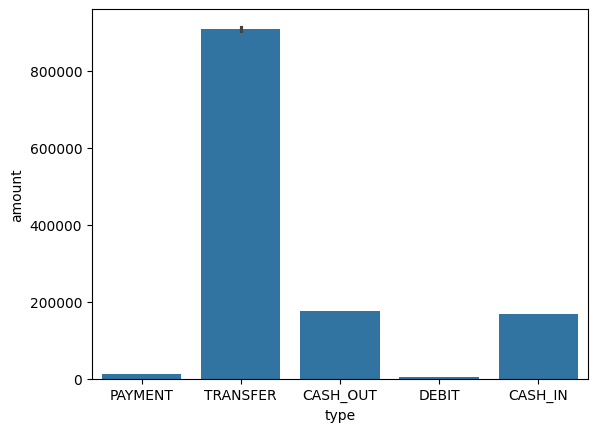

In [10]:
# Plotting type vs amount bargraph
sns.barplot(x='type', y='amount', data=data)


In [11]:
data['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

Observed large nos of NotFraud cases in dataset might cause Overfitting in our model. So we have synthetically reduced the NotFraud cases to tune the dataset

In [12]:
# Sampling for even data for training
notF = data[data.isFraud == 0].sample(8213)
isF = data[data.isFraud == 1]

In [13]:
#Creating new Data with sampled data
newData = pd.concat([isF, notF]).sort_index()
newData.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4273384,307,PAYMENT,14750.12,C11314054,30160.00,15409.88,M239618160,0.00,0.00,0,0
1059646,111,TRANSFER,501496.31,C1595104027,501496.31,0.00,C643646528,0.00,0.00,1,0
4388748,317,TRANSFER,7535.58,C11831964,7535.58,0.00,C802410376,0.00,0.00,1,0
3876959,283,CASH_IN,99735.46,C434901890,1303889.61,1403625.07,C1187904784,120559.60,20824.14,0,0
4997086,352,CASH_OUT,74969.25,C1589398977,100693.00,25723.75,C1435946153,474916.69,549885.93,0,0


In [14]:
newData.shape

(16426, 11)

In [15]:
newData['isFraud'].value_counts()

isFraud
1    8213
0    8213
Name: count, dtype: int64

In [16]:
#Information about new data
newData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ MB


In [17]:
#Description of new data
newData.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000,16426.000000
mean,304.871606,8.232504e+05,1.216179e+06,4.989768e+05,8.346977e+05,1.262680e+06,0.500000,0.000974
std,193.318142,1.863186e+06,3.203691e+06,2.431844e+06,3.429203e+06,3.829023e+06,0.500015,0.031196
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,161.000000,3.663177e+04,1.021181e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,282.000000,1.706591e+05,1.150853e+05,0.000000e+00,0.000000e+00,1.205315e+05,0.500000,0.000000
75%,407.000000,5.396587e+05,7.865499e+05,0.000000e+00,5.192990e+05,1.089408e+06,1.000000,0.000000
max,743.000000,2.057001e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


<Axes: xlabel='type', ylabel='amount'>

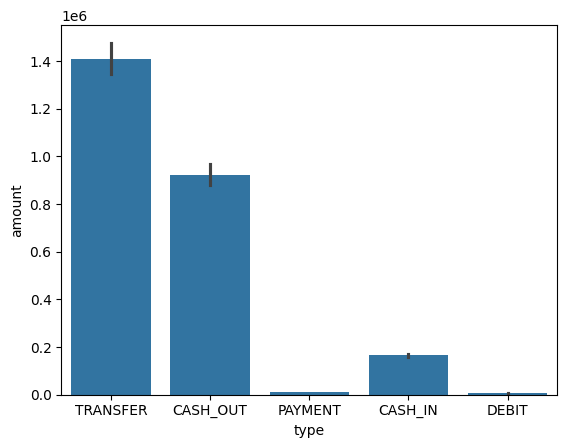

In [18]:
#Plotting
sns.barplot(x='type', y='amount', data = newData)

In [19]:
#Table with number of fraud and non-fraud with type of payment
CrosstabResult=pd.crosstab(index=newData.type,columns=data.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1822,0
CASH_OUT,2914,4116
DEBIT,59,0
PAYMENT,2759,0
TRANSFER,659,4097


As fraud transactions are of either "Cash out" or "transfer"

<Axes: xlabel='type'>

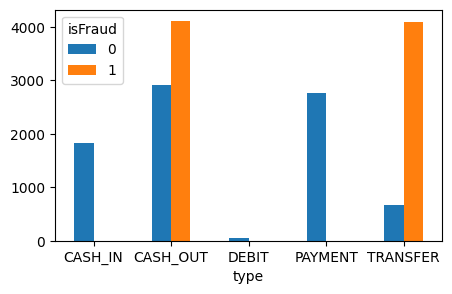

In [20]:
CrosstabResult.plot.bar(figsize=(5,3), rot=0)


In [21]:
CrossTab_step= pd.crosstab(index=newData.step,columns=data.isFraud).sort_values(by=1, ascending=False).head(5)
CrossTab_step

isFraud,0,1
step,,
212,54,40
523,0,30
387,0,28
501,0,28
730,0,28


<Axes: xlabel='step', ylabel='Density'>

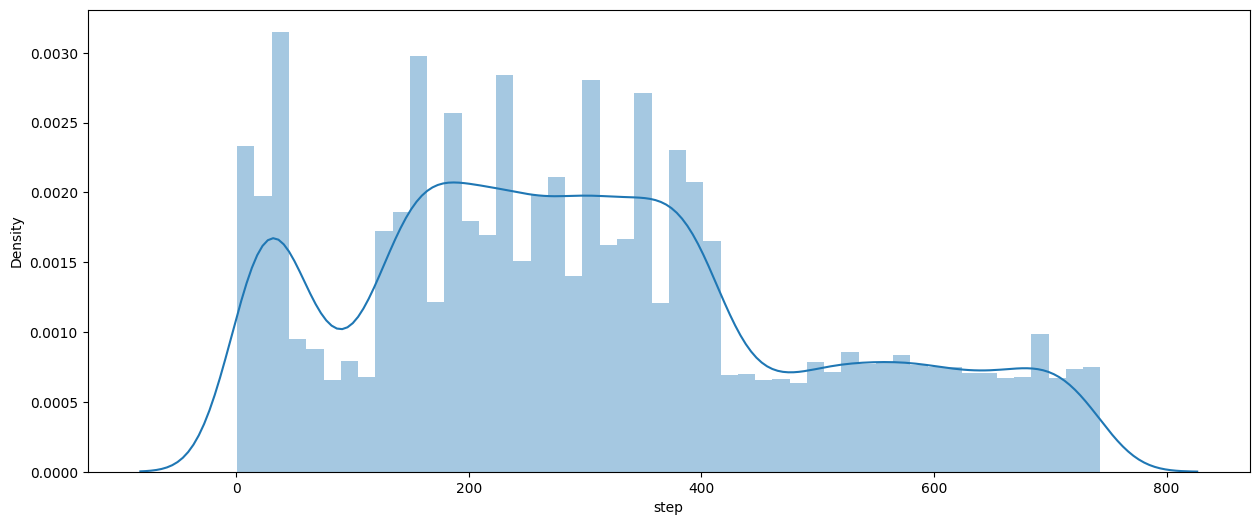

In [22]:
plt.figure(figsize=(15, 6))
sns.distplot(newData['step'], bins=50)


Correlation between features

# Data preprocessing

In [23]:
# Encoding of Type column
data_new = pd.get_dummies(newData, columns=['type'])
data_new.head()


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,1,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,False,True,False,False,False
178,1,9536.54,C649769713,0.0,0.0,C1060830840,49161.0,130747.56,0,0,False,True,False,False,False
251,1,2806.00,C1420196421,2806.0,0.0,C972765878,0.0,0.00,1,0,False,False,False,False,True
252,1,2806.00,C2101527076,2806.0,0.0,C1007251739,26202.0,0.00,1,0,False,True,False,False,False


In [24]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 2 to 6362619
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   amount          16426 non-null  float64
 2   nameOrig        16426 non-null  object 
 3   oldbalanceOrg   16426 non-null  float64
 4   newbalanceOrig  16426 non-null  float64
 5   nameDest        16426 non-null  object 
 6   oldbalanceDest  16426 non-null  float64
 7   newbalanceDest  16426 non-null  float64
 8   isFraud         16426 non-null  int64  
 9   isFlaggedFraud  16426 non-null  int64  
 10  type_CASH_IN    16426 non-null  bool   
 11  type_CASH_OUT   16426 non-null  bool   
 12  type_DEBIT      16426 non-null  bool   
 13  type_PAYMENT    16426 non-null  bool   
 14  type_TRANSFER   16426 non-null  bool   
dtypes: bool(5), float64(5), int64(3), object(2)
memory usage: 1.5+ MB


In [25]:
data_new.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000,16426.000000
mean,304.871606,8.232504e+05,1.216179e+06,4.989768e+05,8.346977e+05,1.262680e+06,0.500000,0.000974
std,193.318142,1.863186e+06,3.203691e+06,2.431844e+06,3.429203e+06,3.829023e+06,0.500015,0.031196
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,161.000000,3.663177e+04,1.021181e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,282.000000,1.706591e+05,1.150853e+05,0.000000e+00,0.000000e+00,1.205315e+05,0.500000,0.000000
75%,407.000000,5.396587e+05,7.865499e+05,0.000000e+00,5.192990e+05,1.089408e+06,1.000000,0.000000
max,743.000000,2.057001e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


In [26]:
# Dropping irrelevant columns like nameOrig, nameDest, isFlaggedFraud
data_new= data_new.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1)

In [27]:
X = data_new.loc[:, data_new.columns!= 'isFraud']
y = data_new.loc[:, data_new.columns== 'isFraud']

In [28]:
X.shape, y.shape


((16426, 11), (16426, 1))

# Splitting Dataset

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


# Model Training

In [30]:
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression

 Logistic Regression

In [31]:
# Creating a object of Logistic Regression
lr = LogisticRegression()

#Training the model
lr.fit(X_train, y_train)
print(f'{lr}')
print('-------------------------------------------')

# Printing roc_score
train_preds = lr.predict_proba(X_train)[:, 1]
tr_ac = ras(y_train, train_preds)
print('Training Accuracy : ', tr_ac)


y_preds = lr.predict_proba(X_test)[:, 1]
vd_ac = ras(y_test, y_preds)
print('Validation Accuracy : ', vd_ac)


print()

LogisticRegression()
-------------------------------------------
Training Accuracy :  0.961463749725904
Validation Accuracy :  0.9582983242425023



# Confusion matrix

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

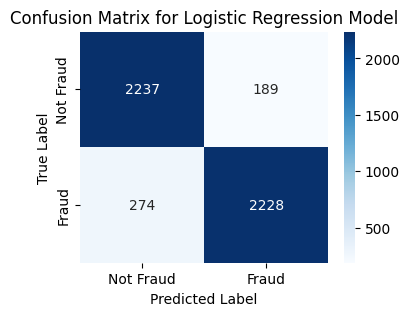

In [33]:
threshold = 0.5
# if predicted value>0.5 then it is classified as 1, otherwise 0.
y_pred_binary = np.where(y_preds >= threshold, 1, 0)

cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Model Deployment

In [34]:
import pickle
pickle.dump(lr,open("detector.pkl","wb"))